In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### data reading

In [2]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# Stage 2.1

### test function distance_between_skew_lines()

In [3]:
from retina import distance_between_skew_lines, points2vec

In [4]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    if len(track1)>1:
        x0=track1.X.values[0]
        x1=track1.X.values[1]
        y0=track1.Y.values[0]
        y1=track1.Y.values[1]
        z0=track1.Z.values[0]
        z1=track1.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    for i in range(len(track1)):
        params = track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    if len(track2)>1:
        x0=track2.X.values[0]
        x1=track2.X.values[1]
        y0=track2.Y.values[0]
        y1=track2.Y.values[1]
        z0=track2.Z.values[0]
        z1=track2.Z.values[1]
    else:
        continue
    track_point, track_direction = points2vec(np.array([x0, y0, z0, x1, y1, z1]))
    for i in range(len(track2)):
        params = track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i]
        tube_point, tube_direction = points2vec(params)
        exp.append(distance_between_skew_lines(track_point, track_direction, tube_point, tube_direction))
        real.append(track2.dist2Wire.values[i])

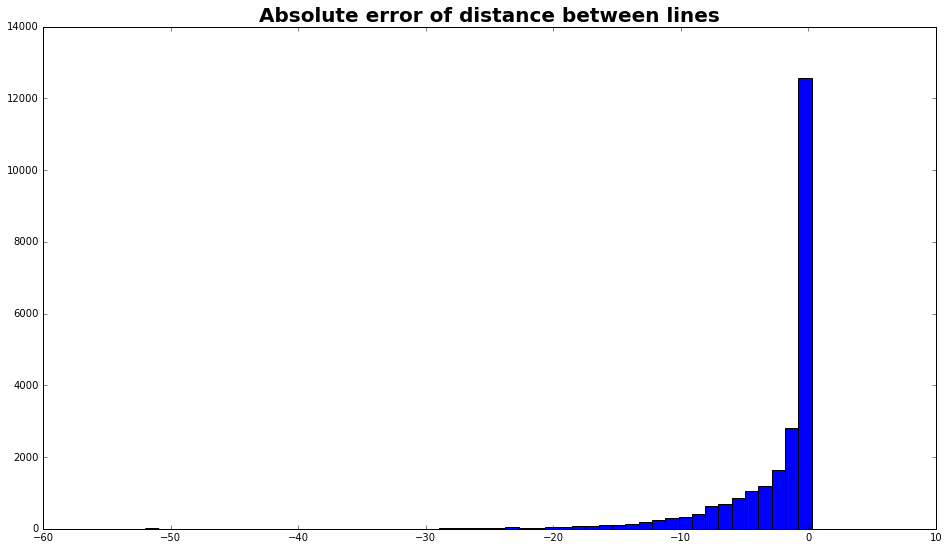

In [5]:
plt.figure(figsize=(16,9))
plt.title("Absolute error of distance between lines", fontsize=20, fontweight='bold')
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=50)

### how to use artifitial_retina_response()

In [6]:
from retina import artifitial_retina_response

In [7]:
A0 = []
A = []
for i in range(len(track1.index)):
    a0, a = points2vec(track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
    A0.append(a0)
    A.append(a)
A0 = np.array(A0)
A = np.array(A)

In [8]:
artifitial_retina_response(track_point, track_direction, A0, A, 20)

array(1.179616670647115e-05)

# Stage 2.2

# 2D projections

In [9]:
from retina import plot_artifitial_retina_response

function converting line from $~~~\frac{x-x_{0}}{l} = \frac{y-y_{0}}{m} = z~~~$ to $~~~\vec{a_{0}}+\overrightarrow{a}$

In [10]:
event = data[data.EventID==2]
event_before_magnet = event[event.StatNb<3]

In [11]:
size = 30
ms = np.linspace(-0.2, 0.2, size)
y0s = np.linspace(-100, 1000, size)
ls = np.linspace(-0.1, 0.1, size)
x0s = np.linspace(-100, 500, size)

In [ ]:
pojections = plot_artifitial_retina_response(event_before_magnet, x0s, ls, y0s, ms)